In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [2]:

# 1. 데이터 로드 및 전처리
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 형태 확인
print("X_train shape:", X_train.shape)  # (60000, 28, 28)
print("y_train shape:", y_train.shape)  # (60000,)
print("X_test shape:", X_test.shape)    # (10000, 28, 28)
print("y_test shape:", y_test.shape)    # (10000,)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


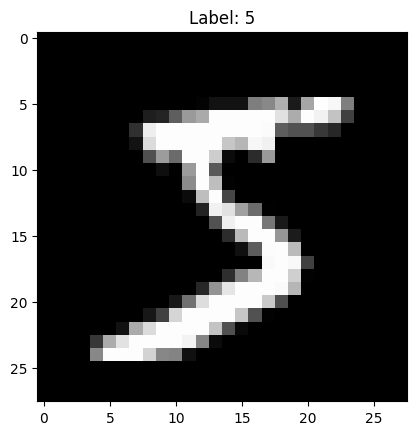

In [3]:

# 샘플 이미지 및 라벨 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [4]:

# 정규화 (0~1 범위로)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [5]:

# 채널 차원 추가 (28x28x1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print("X_train shape after adding channel:", X_train.shape)


X_train shape after adding channel: (60000, 28, 28, 1)


In [6]:

# 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("y_train shape after one-hot encoding:", y_train.shape)


y_train shape after one-hot encoding: (60000, 10)


In [7]:

# 2. AlexNet 변형 모델 정의
model = models.Sequential([
    layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=2, strides=2),

    layers.Conv2D(192, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),

    layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:

# 4. 모델 요약 출력
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 192)    │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 384)      │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,441,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,513,994 (108.77 MB)

 Trainable params: 28,513,994 (108.77 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:

# 5. 모델 학습
history = model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2)


Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.7789 - loss: 0.6495 - val_accuracy: 0.9814 - val_loss: 0.0599
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9835 - loss: 0.0556 - val_accuracy: 0.9875 - val_loss: 0.0465
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9880 - loss: 0.0396 - val_accuracy: 0.9908 - val_loss: 0.0377


In [11]:

# 6. 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9878 - loss: 0.0433
Test accuracy: 0.9901


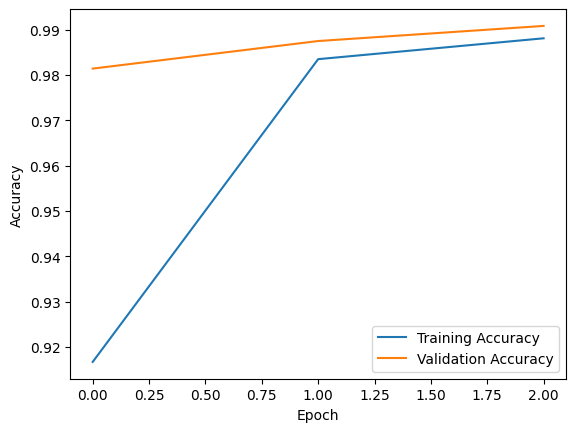

In [12]:

# 7. 학습 과정 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
